# ML Assignment : BoomBikes Project
    
    The company wants to know:

    Which variables are significant in predicting the demand for shared bikes.
    How well those variables describe the bike demands
    
    cnt is the target variable

## Reading and understanding the Data

In [43]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [44]:
df = pd.read_csv('day.csv')

In [45]:
#checking null columns
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [46]:
#checking shape
df.shape

(730, 16)

In [47]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [48]:
df.drop(['instant'],axis = 1, inplace=True) #not important

In [49]:
df.drop(['dteday'],axis = 1, inplace=True) #yr and month already exists

In [50]:
df.drop(['casual','registered'],axis=1,inplace=True) # cnt covers the need

In [51]:
#df['season'].replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"}, inplace=True) # replacing with categorical variables

In [30]:
#df['weathersit'].replace({1:"cloudy", 2:"misty", 3:"snow", 4:"Rain"}, inplace=True) # replacing with categorical variables

#1: Clear, Few clouds, Partly cloudy, Partly cloudy
 #2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [31]:
#df['weekday'].replace({0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"},inplace=True)

In [32]:
#df['mnth'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'},inplace=True)

In [52]:
#df['yr'].replace({0:"2018",1:"2019"},inplace=True

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [54]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Visualising the Data

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

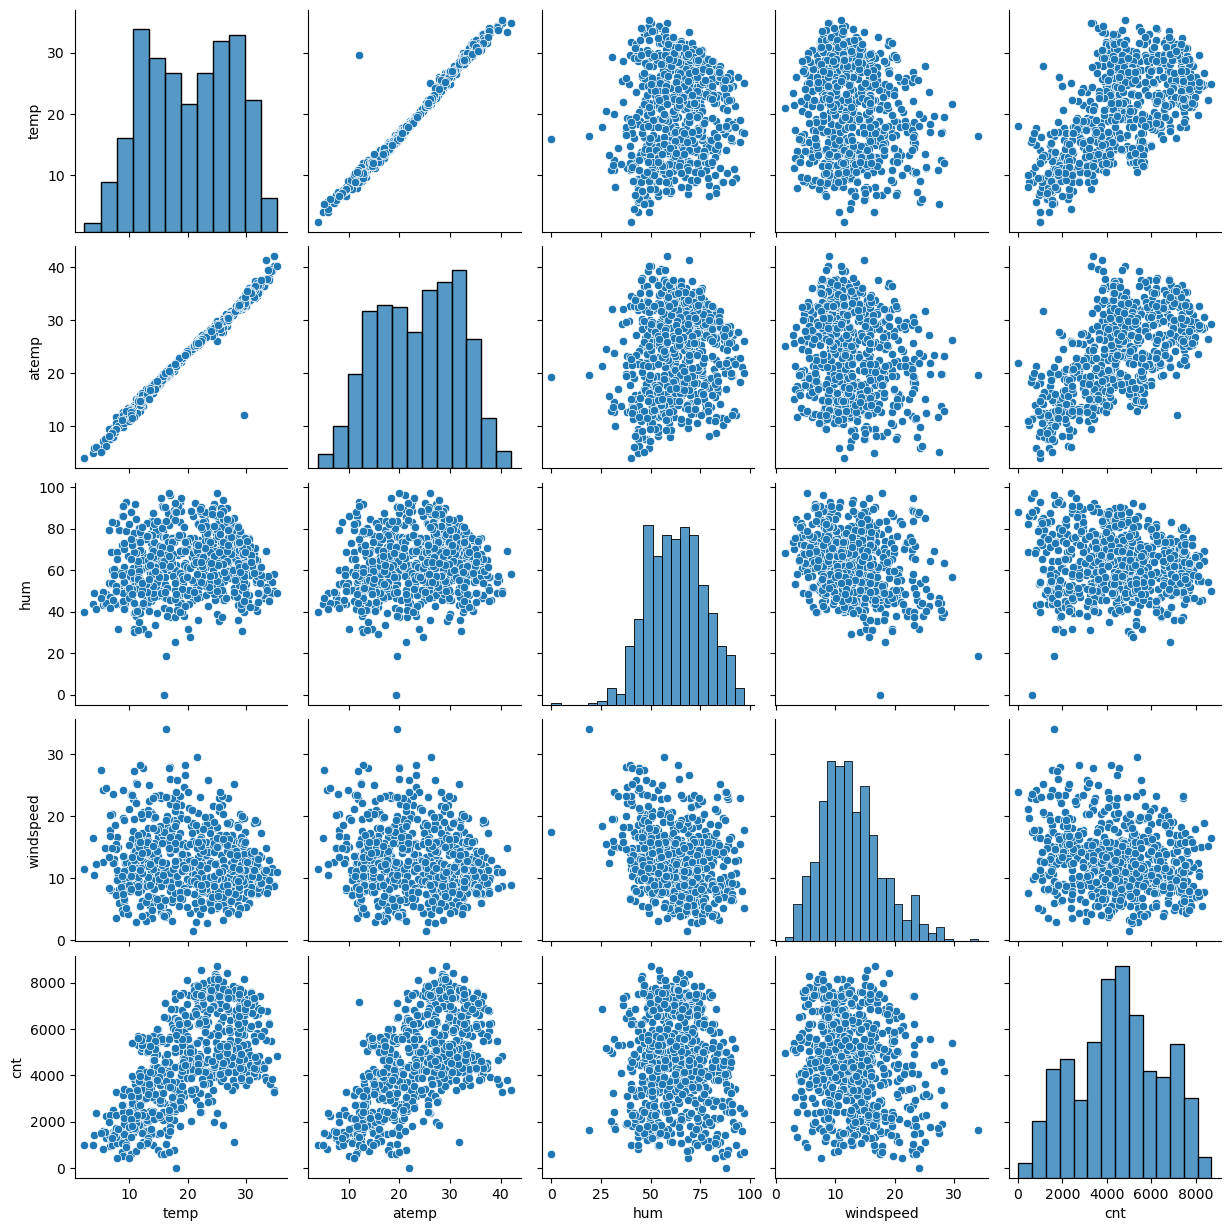

<Figure size 1200x600 with 0 Axes>

In [56]:
sns.pairplot(df,vars = ['temp','atemp','hum','windspeed','cnt'])
plt.show()
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

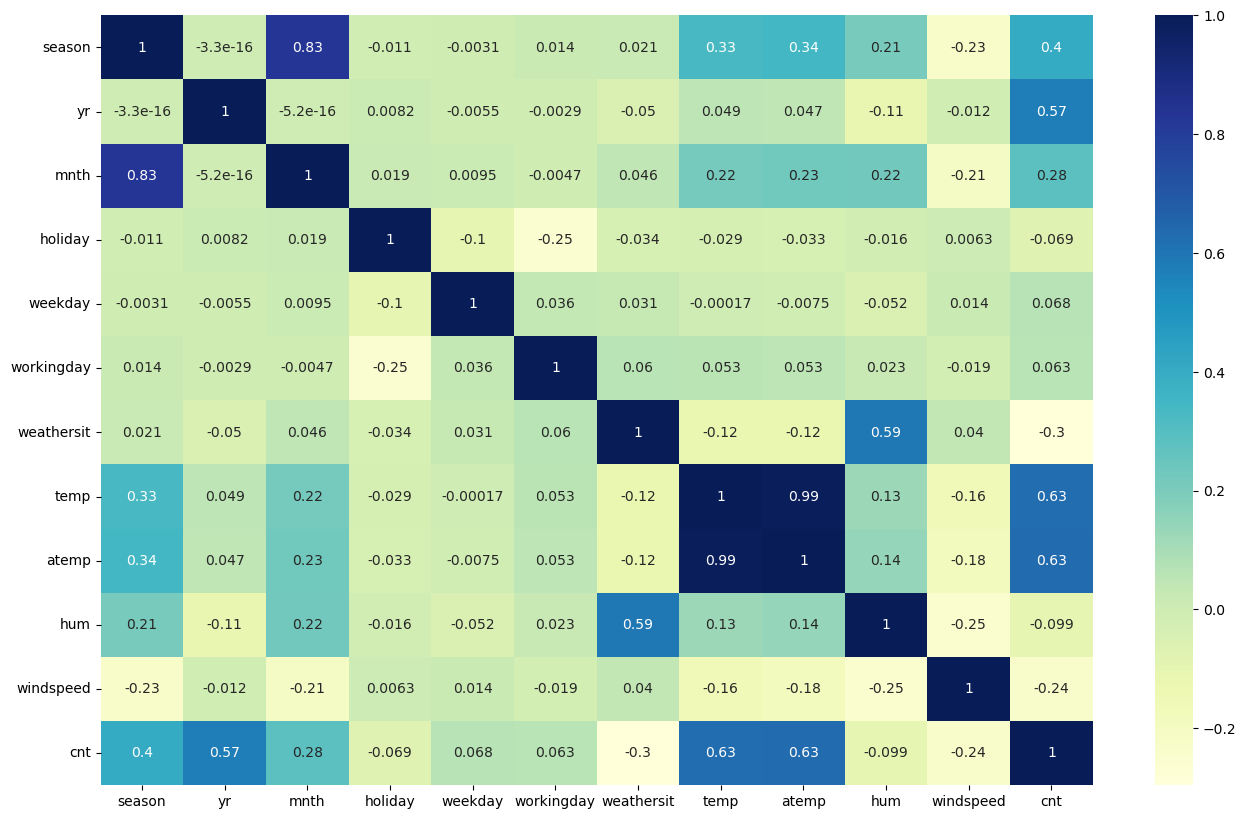

In [57]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [58]:
df.drop(['atemp'],axis=1,inplace=True)

In [59]:
df['season'].replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"}, inplace=True) # replacing with categorical variables

In [60]:
df['weathersit'].replace({1:"cloudy", 2:"misty", 3:"snow", 4:"Rain"}, inplace=True) # replacing with categorical variables

#1: Clear, Few clouds, Partly cloudy, Partly cloudy
 #2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [61]:
df['weekday'].replace({0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"},inplace=True)

In [62]:
df['mnth'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'},inplace=True)

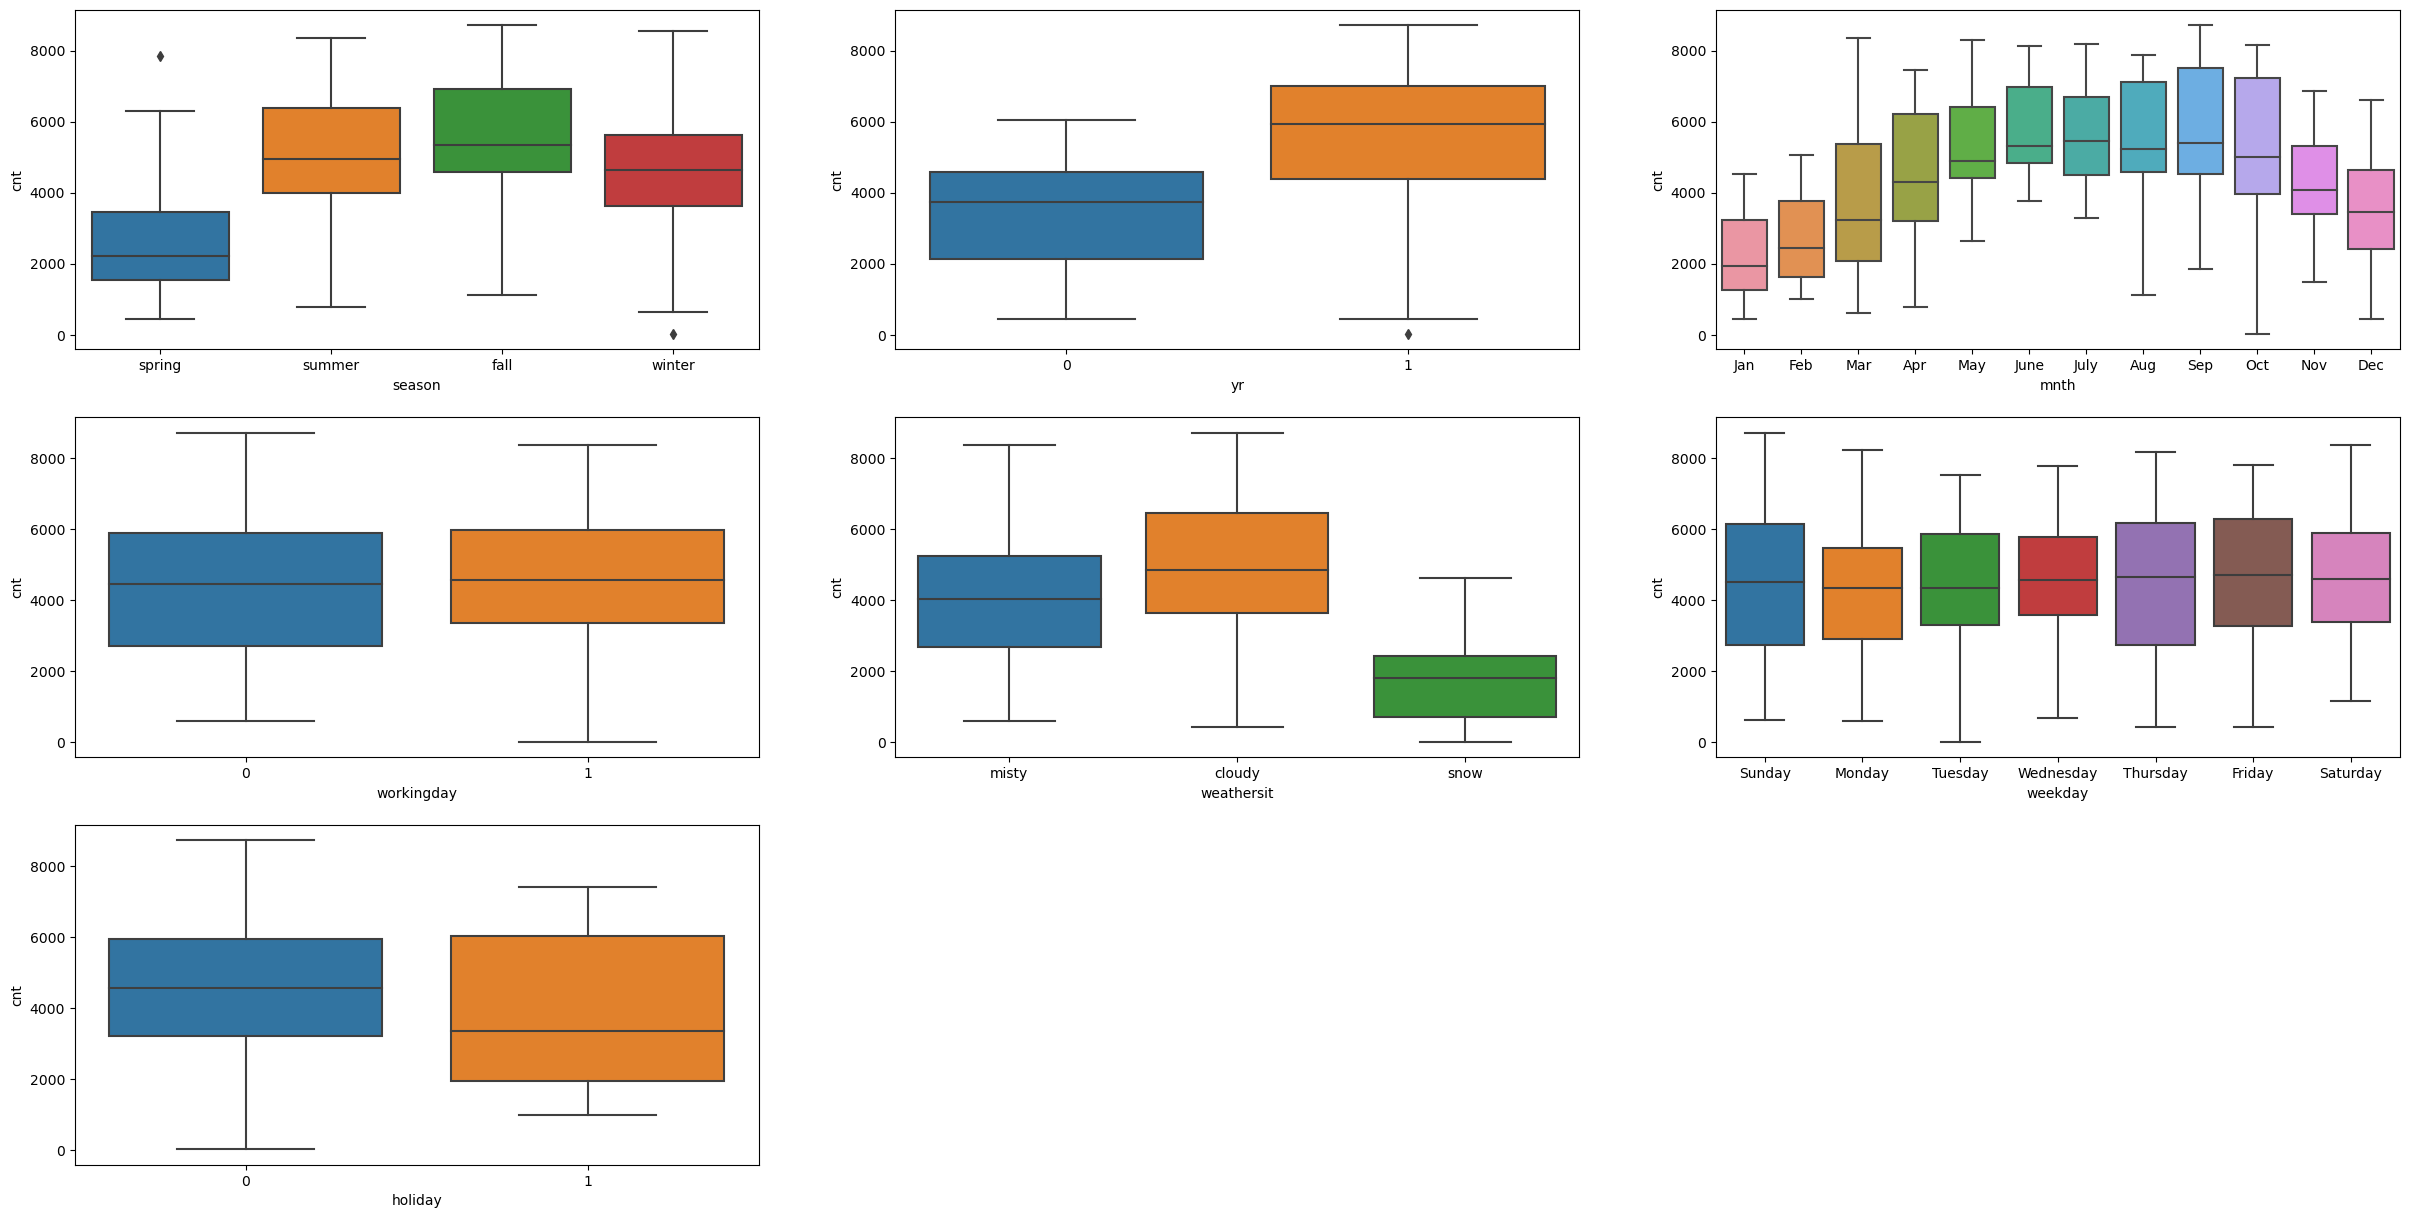

In [63]:
#Visualising categorical Variables to understand data better
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)#yr','mnth','workingday','weathersit','weekday'
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.show()

### Insights from EDA:

- Season - We can notice a positive trend in the number of customers in 3 - Fall, 2 - Summer,  and 4 - Winter seasons
- Year - The overall business shows a increasing trend in their user base year on year
- Month - Similar to the season trend, there is a postive trend in the months of summer, fall and winter.
- Holiday : On holidays, the users show a wider spread in the counts. On normal days, the users are more than holidays
- Weekday : Weekdays or weekends do not show any specific trend here.
- Weathersit : Clearer weathers show a postive trend in the number of bike users
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

## categorical variables list > 2
season : 1:spring, 2:summer, 3:fall, 4:winter
months : 1 to 12
weekday : 1 to 6
weathersit : 1, 2, 3 and 4

## converting catergorical variables to dummy variables

In [64]:
df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [65]:
season = pd.get_dummies(df.season,drop_first=True)

In [66]:
season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [67]:
df=pd.concat([df,season],axis=1)

In [68]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,Jan,0,Sunday,0,misty,14.110847,80.5833,10.749882,985,1,0,0
1,spring,0,Jan,0,Monday,0,misty,14.902598,69.6087,16.652113,801,1,0,0
2,spring,0,Jan,0,Tuesday,1,cloudy,8.050924,43.7273,16.636703,1349,1,0,0
3,spring,0,Jan,0,Wednesday,1,cloudy,8.200000,59.0435,10.739832,1562,1,0,0
4,spring,0,Jan,0,Thursday,1,cloudy,9.305237,43.6957,12.522300,1600,1,0,0


In [69]:
df.weathersit.value_counts()

cloudy    463
misty     246
snow       21
Name: weathersit, dtype: int64

In [70]:
weathersit = pd.get_dummies(df.weathersit,drop_first =True)

In [71]:
weathersit.head()

,misty,snow
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [72]:
df = pd.concat([df,weathersit],axis=1)

In [73]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,misty,snow
0,spring,0,Jan,0,Sunday,0,misty,14.110847,80.5833,10.749882,985,1,0,0,1,0
1,spring,0,Jan,0,Monday,0,misty,14.902598,69.6087,16.652113,801,1,0,0,1,0
2,spring,0,Jan,0,Tuesday,1,cloudy,8.050924,43.7273,16.636703,1349,1,0,0,0,0
3,spring,0,Jan,0,Wednesday,1,cloudy,8.200000,59.0435,10.739832,1562,1,0,0,0,0
4,spring,0,Jan,0,Thursday,1,cloudy,9.305237,43.6957,12.522300,1600,1,0,0,0,0


In [74]:
df.weekday.value_counts()

Sunday       105
Monday       105
Tuesday      105
Wednesday    104
Friday       104
Saturday     104
Thursday     103
Name: weekday, dtype: int64

In [75]:
weekday=pd.get_dummies(df.weekday, drop_first = True )

In [76]:
df = pd.concat([df,weekday], axis=1)

In [77]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,summer,winter,misty,snow,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,spring,0,Jan,0,Sunday,0,misty,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,1,0,0,0
1,spring,0,Jan,0,Monday,0,misty,14.902598,69.6087,16.652113,...,0,0,1,0,1,0,0,0,0,0
2,spring,0,Jan,0,Tuesday,1,cloudy,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,0,1,0
3,spring,0,Jan,0,Wednesday,1,cloudy,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,0,0,1
4,spring,0,Jan,0,Thursday,1,cloudy,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [78]:
df.mnth.value_counts()

Jan     62
Mar     62
May     62
July    62
Aug     62
Oct     62
Dec     62
Apr     60
June    60
Sep     60
Nov     60
Feb     56
Name: mnth, dtype: int64

In [79]:
mnth = pd.get_dummies(df.mnth, drop_first=True)

In [80]:
mnth.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [81]:
df=pd.concat([df,mnth], axis=1)

In [82]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,spring,0,Jan,0,Sunday,0,misty,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,Jan,0,Monday,0,misty,14.902598,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,Jan,0,Tuesday,1,cloudy,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Wednesday,1,cloudy,8.200000,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,0,Thursday,1,cloudy,9.305237,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0


In [83]:
df.drop(columns = ['season','weathersit','mnth','weekday'], inplace=True)

## Splitting into train and test dataset

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
np.random.seed(0)

In [86]:
df_train, df_test = train_test_split(df,train_size=0.7,test_size=0.3,random_state=50)

In [87]:
df_train.shape

(510, 29)

In [88]:
df_test.shape

(219, 29)

## Rescaling the features

In [89]:
from sklearn.preprocessing import MinMaxScaler

In [90]:
scaler = MinMaxScaler()
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [91]:
num_vars=['temp','hum','windspeed','cnt']

In [92]:
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [93]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
707,1,0,0,0.417140,0.933018,0.243629,0.368845,0,0,1,...,1,0,0,0,0,0,0,0,0,0
172,0,0,1,0.865247,0.729068,0.274549,0.515992,0,0,0,...,0,0,0,0,1,0,0,0,0,0
14,0,0,0,0.223565,0.513954,0.243603,0.141049,1,0,0,...,0,0,1,0,0,0,0,0,0,0
204,0,0,0,0.989306,0.567625,0.267859,0.412333,0,0,0,...,0,0,0,1,0,0,0,0,0,0
182,0,0,0,0.871664,0.458136,0.150755,0.586401,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [94]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.482353,0.023529,0.705882,0.552680,0.644848,0.318203,0.509945,0.245098,0.254902,0.250980,...,0.094118,0.076471,0.074510,0.078431,0.082353,0.094118,0.100000,0.086275,0.086275,0.064706
std,0.500179,0.151726,0.456092,0.230600,0.149640,0.167086,0.223408,0.430568,0.436234,0.434003,...,0.292279,0.266010,0.262857,0.269113,0.275172,0.292279,0.300295,0.281045,0.281045,0.246248
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343347,0.524581,0.197916,0.350523,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.553497,0.648347,0.295422,0.516222,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.757231,0.752576,0.406471,0.672141,0.000000,1.000000,0.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


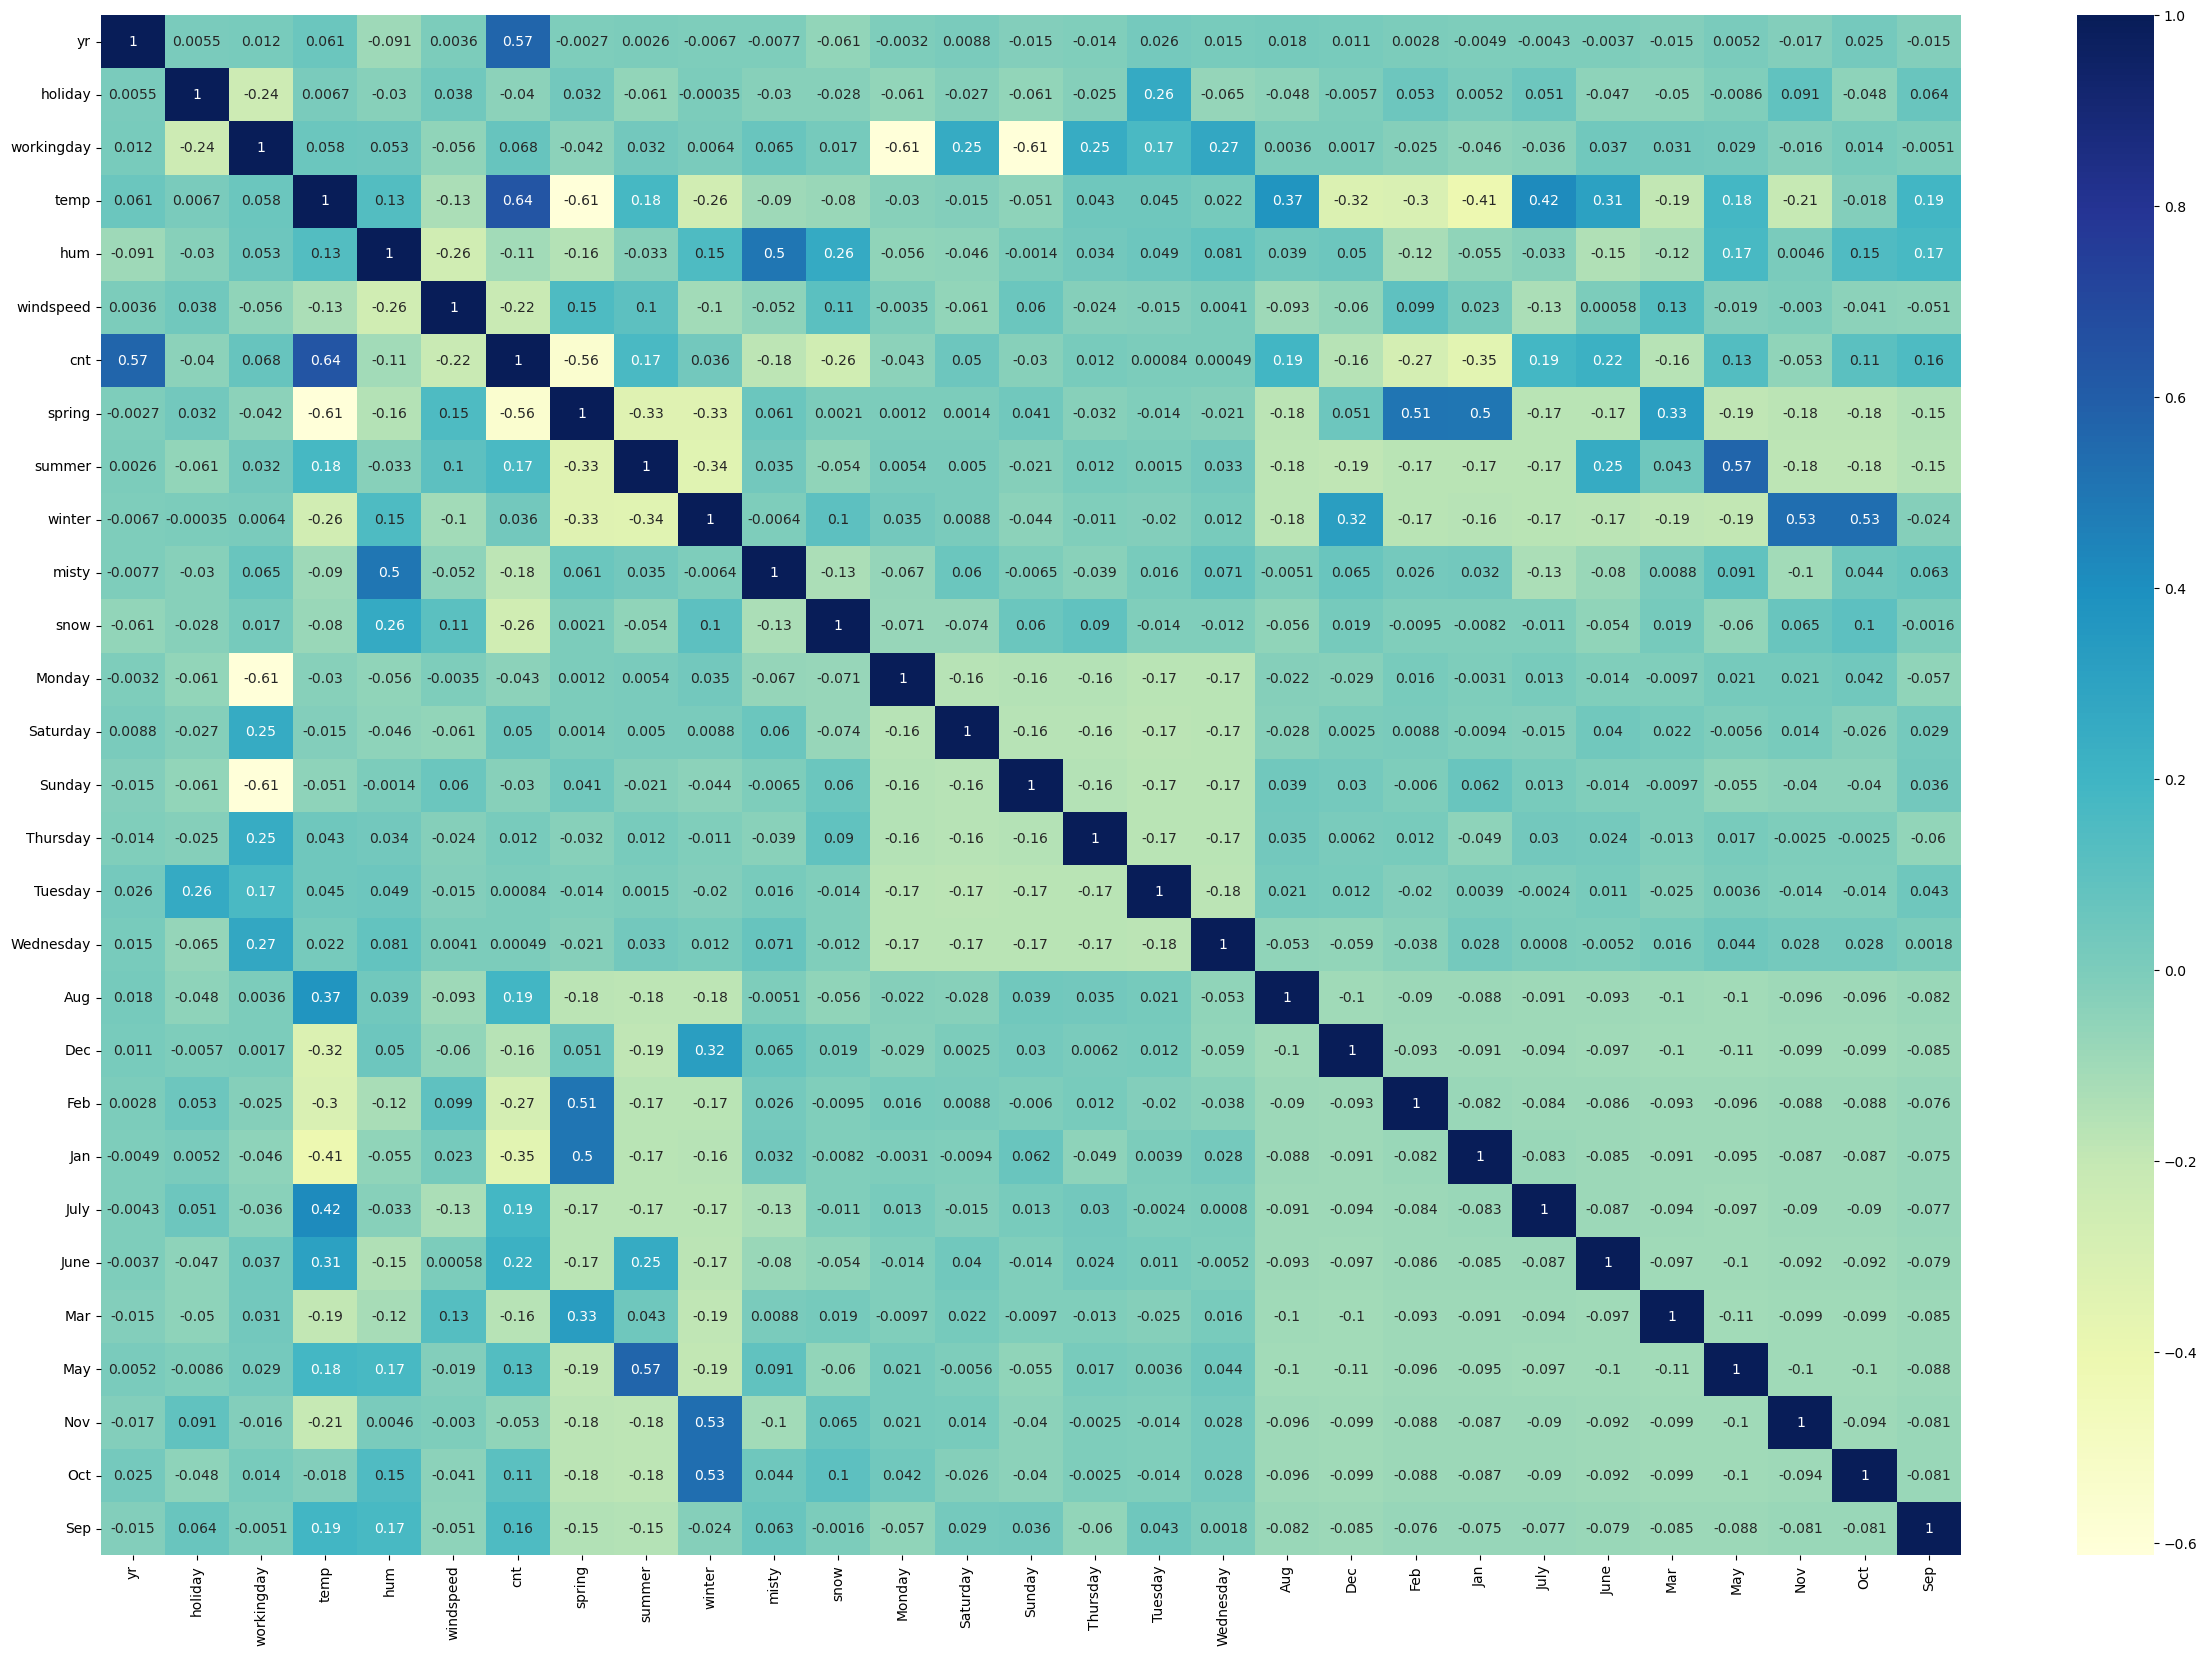

In [95]:
plt.figure(figsize = (30, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()
# Let's check the correlation coefficients to see which variables are highly correlated

### From the heatmap we can see temp, year are correlated to the 'cnt' variable. 

In [96]:
import statsmodels.api as sm
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
707,1,0,0,0.417140,0.933018,0.243629,0.368845,0,0,1,...,1,0,0,0,0,0,0,0,0,0
172,0,0,1,0.865247,0.729068,0.274549,0.515992,0,0,0,...,0,0,0,0,1,0,0,0,0,0
14,0,0,0,0.223565,0.513954,0.243603,0.141049,1,0,0,...,0,0,1,0,0,0,0,0,0,0
204,0,0,0,0.989306,0.567625,0.267859,0.412333,0,0,0,...,0,0,0,1,0,0,0,0,0,0
182,0,0,0,0.871664,0.458136,0.150755,0.586401,0,0,0,...,0,0,0,1,0,0,0,0,0,0


# Building the models 

In [97]:
y_train = df_train.pop('cnt')
X_train = df_train

In [98]:
X_train_lm = sm.add_constant(X_train['temp'])

In [99]:
lr1 = sm.OLS(y_train, X_train_lm).fit()

In [100]:
lr1.params

const    0.166808
temp     0.620860
dtype: float64

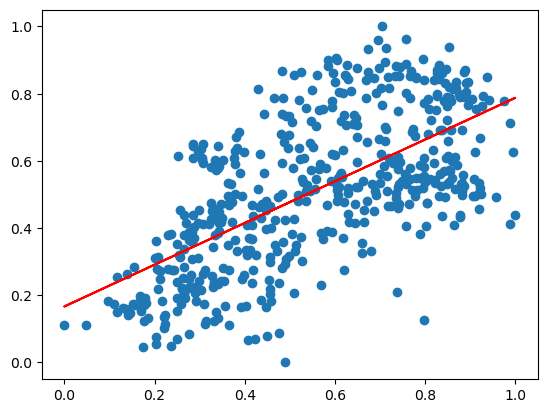

In [103]:
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.1668 + 0.6209*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [104]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     354.0
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           2.56e-60
Time:                        12:33:31   Log-Likelihood:                 176.05
No. Observations:                 510   AIC:                            -348.1
Df Residuals:                     508   BIC:                            -339.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1668      0.020      8.443      0.000       0.128       0.206
temp           0.6209      0.033     18.815      0.000       0.556       0.686
==============================================================================
Omnibus:                        9.967   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                7.009
Skew:                           0.160   Prob(JB):                       0.0301
Kurtosis:                       2.523   Cond. No.                         5.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### We have R squared value of 0.41 for temperature variable. 41% of the variance is explained by temperature feature. P-value of the feature is also 0. So, temperature variable is  significant 

Our line beta 0 is 0.6209 and beta 1 is 0.1668

In [105]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [106]:
lm = LinearRegression()
lm.fit(X_train, y_train)
#rfe = RFE(lm,15)
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [107]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('misty', True, 1),
 ('snow', True, 1),
 ('Monday', True, 1),
 ('Saturday', False, 13),
 ('Sunday', True, 1),
 ('Thursday', False, 10),
 ('Tuesday', False, 7),
 ('Wednesday', False, 8),
 ('Aug', False, 12),
 ('Dec', False, 14),
 ('Feb', False, 5),
 ('Jan', False, 11),
 ('July', False, 6),
 ('June', False, 4),
 ('Mar', False, 2),
 ('May', False, 3),
 ('Nov', False, 9),
 ('Oct', True, 1),
 ('Sep', True, 1)]

In [108]:
rfe_vars=X_train.columns[rfe.support_]
rfe_vars

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'misty', 'snow', 'Monday', 'Sunday', 'Oct', 'Sep'],
      dtype='object')

In [109]:
# Model 2: Building the model using RFE selected variables

In [110]:
#Creating a train dataset using RFE variables

X_train_rfe=X_train[rfe_vars]
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,misty,snow,Monday,Sunday,Oct,Sep
707,1,0,0,0.417140,0.933018,0.243629,0,0,1,1,0,1,0,0,0
172,0,0,1,0.865247,0.729068,0.274549,0,0,0,0,0,0,0,0,0
14,0,0,0,0.223565,0.513954,0.243603,1,0,0,1,0,0,1,0,0
204,0,0,0,0.989306,0.567625,0.267859,0,0,0,0,0,1,0,0,0
182,0,0,0,0.871664,0.458136,0.150755,0,0,0,0,0,0,1,0,0


In [111]:
# Adding a constant to X_train_rfe

X_train_rfe=sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,misty,snow,Monday,Sunday,Oct,Sep
707,1.0,1,0,0,0.417140,0.933018,0.243629,0,0,1,1,0,1,0,0,0
172,1.0,0,0,1,0.865247,0.729068,0.274549,0,0,0,0,0,0,0,0,0
14,1.0,0,0,0,0.223565,0.513954,0.243603,1,0,0,1,0,0,1,0,0
204,1.0,0,0,0,0.989306,0.567625,0.267859,0,0,0,0,0,1,0,0,0
182,1.0,0,0,0,0.871664,0.458136,0.150755,0,0,0,0,0,0,1,0,0


In [112]:
# Creating a LR object which we will use to fit the line.

lr2 = sm.OLS(y_train, X_train_rfe).fit()

In [113]:
#Checking the summary

lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     201.3
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          5.83e-194
Time:                        13:32:30   Log-Likelihood:                 526.01
No. Observations:                 510   AIC:                            -1022.
Df Residuals:                     495   BIC:                            -958.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2293      0.028      8.207      0.000       0.174       0.284
yr             0.2293      0.008     29.158      0.000       0.214       0.245
holiday        0.0108      0.022      0.493      0.622      -0.032       0.054
workingday     0.0793      0.010      8.127      0.000       0.060       0.098
temp           0.5166      0.034     15.403      0.000       0.451       0.582
hum           -0.2238      0.037     -6.102      0.000      -0.296      -0.152
windspeed     -0.1929      0.025     -7.626      0.000      -0.243      -0.143
spring        -0.0549      0.021     -2.650      0.008      -0.096      -0.014
summer         0.0639      0.013      4.731      0.000       0.037       0.090
winter         0.0949      0.019      4.990      0.000       0.058       0.132
misty         -0.0426      0.010     -4.056      0.000      -0.063      -0.022
snow          -0.2095      0.026     -8.212      0.000      -0.260      -0.159
Monday         0.0435      0.012      3.587      0.000       0.020       0.067
Sunday         0.0956      0.012      8.014      0.000       0.072       0.119
Oct            0.0453      0.017      2.648      0.008       0.012       0.079
Sep            0.0878      0.017      5.112      0.000       0.054       0.122
==============================================================================
Omnibus:                       83.201   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.890
Skew:                          -0.806   Prob(JB):                     6.56e-49
Kurtosis:                       5.800   Cond. No.                     3.71e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.11e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [114]:
#From the p-values, we can see that we have variables with high p - values or variables which are not significant.

In [115]:
## Calculating VIF

In [116]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

#X_train_rfe = X_train_rfe.drop(['const'], axis=1) # Dropping constant variable from the df

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,holiday,inf
3,workingday,inf
12,Monday,inf
13,Sunday,inf
7,spring,5.29
9,winter,4.52
4,temp,3.97
8,summer,2.30
5,hum,2.00
10,misty,1.65


In [117]:
# we will drop p>0.05 and VIF >5

In [118]:
# Dropping holiday due to high vif
X_train_rfe.drop(columns='holiday', inplace=True)

In [119]:
# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr3 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     201.3
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          5.83e-194
Time:                        15:24:34   Log-Likelihood:                 526.01
No. Observations:                 510   AIC:                            -1022.
Df Residuals:                     495   BIC:                            -958.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2402      0.043      5.555      0.000       0.155       0.325
yr             0.2293      0.008     29.158      0.000       0.214       0.245
workingday     0.0685      0.026      2.643      0.008       0.018       0.119
temp           0.5166      0.034     15.403      0.000       0.451       0.582
hum           -0.2238      0.037     -6.102      0.000      -0.296      -0.152
windspeed     -0.1929      0.025     -7.626      0.000      -0.243      -0.143
spring        -0.0549      0.021     -2.650      0.008      -0.096      -0.014
summer         0.0639      0.013      4.731      0.000       0.037       0.090
winter         0.0949      0.019      4.990      0.000       0.058       0.132
misty         -0.0426      0.010     -4.056      0.000      -0.063      -0.022
snow          -0.2095      0.026     -8.212      0.000      -0.260      -0.159
Monday         0.0327      0.028      1.185      0.237      -0.022       0.087
Sunday         0.0848      0.028      3.074      0.002       0.031       0.139
Oct            0.0453      0.017      2.648      0.008       0.012       0.079
Sep            0.0878      0.017      5.112      0.000       0.054       0.122
==============================================================================
Omnibus:                       83.201   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.890
Skew:                          -0.806   Prob(JB):                     6.56e-49
Kurtosis:                       5.800   Cond. No.                         26.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1) # Dropping constant variable from the df

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,32.93
1,workingday,19.97
2,temp,19.18
4,windspeed,4.95
5,spring,4.94
7,winter,4.64
10,Monday,4.60
11,Sunday,4.51
6,summer,2.70
8,misty,2.42


In [121]:
#Monday has high p value and close to high VIF
X_train_rfe.drop(columns='Monday', inplace=True)

In [122]:
# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr4 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     216.5
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          7.80e-195
Time:                        15:24:36   Log-Likelihood:                 525.29
No. Observations:                 510   AIC:                            -1023.
Df Residuals:                     496   BIC:                            -963.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2695      0.035      7.610      0.000       0.200       0.339
yr             0.2293      0.008     29.143      0.000       0.214       0.245
workingday     0.0406      0.011      3.739      0.000       0.019       0.062
temp           0.5147      0.034     15.358      0.000       0.449       0.581
hum           -0.2233      0.037     -6.088      0.000      -0.295      -0.151
windspeed     -0.1941      0.025     -7.675      0.000      -0.244      -0.144
spring        -0.0559      0.021     -2.698      0.007      -0.097      -0.015
summer         0.0641      0.014      4.748      0.000       0.038       0.091
winter         0.0940      0.019      4.945      0.000       0.057       0.131
misty         -0.0427      0.011     -4.063      0.000      -0.063      -0.022
snow          -0.2097      0.026     -8.215      0.000      -0.260      -0.160
Sunday         0.0570      0.014      3.932      0.000       0.029       0.085
Oct            0.0466      0.017      2.732      0.007       0.013       0.080
Sep            0.0864      0.017      5.042      0.000       0.053       0.120
==============================================================================
Omnibus:                       83.899   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.739
Skew:                          -0.818   Prob(JB):                     1.17e-48
Kurtosis:                       5.777   Cond. No.                         22.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:
#Recalculating VIF
X_train_rfe = X_train_rfe.drop(['const'], axis=1) # Dropping constant variable from the df

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.57
2,temp,16.48
1,workingday,5.20
4,windspeed,4.79
5,spring,4.16
7,winter,4.13
6,summer,2.48
8,misty,2.38
0,yr,1.97
10,Sunday,1.80


In [124]:
# Dropping sunday variable
X_train_rfe.drop(columns='hum', inplace=True)

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr5 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.8
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          2.79e-188
Time:                        15:24:37   Log-Likelihood:                 506.92
No. Observations:                 510   AIC:                            -987.8
Df Residuals:                     497   BIC:                            -932.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1627      0.032      5.107      0.000       0.100       0.225
yr             0.2347      0.008     28.994      0.000       0.219       0.251
workingday     0.0415      0.011      3.692      0.000       0.019       0.064
temp           0.4652      0.034     13.817      0.000       0.399       0.531
windspeed     -0.1478      0.025     -5.918      0.000      -0.197      -0.099
spring        -0.0715      0.021     -3.354      0.001      -0.113      -0.030
summer         0.0555      0.014      3.988      0.000       0.028       0.083
winter         0.0715      0.019      3.703      0.000       0.034       0.109
misty         -0.0808      0.009     -9.254      0.000      -0.098      -0.064
snow          -0.2770      0.024    -11.629      0.000      -0.324      -0.230
Sunday         0.0564      0.015      3.757      0.000       0.027       0.086
Oct            0.0472      0.018      2.674      0.008       0.013       0.082
Sep            0.0710      0.018      4.044      0.000       0.037       0.105
==============================================================================
Omnibus:                       86.540   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.776
Skew:                          -0.835   Prob(JB):                     2.84e-51
Kurtosis:                       5.858   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
#Recalculating VIF
X_train_rfe = X_train_rfe.drop(['const'], axis=1) # Dropping constant variable from the df

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.75
1,workingday,5.12
3,windspeed,4.68
4,spring,2.38
6,winter,2.34
5,summer,2.05
0,yr,1.96
9,Sunday,1.76
7,misty,1.59
10,Oct,1.58


## At this stage, we have an adjusted R-sqaure values 0.83 which means our model explains 83.2% of the variance in the train data.
Let us try to manually add some significant variables to check if it improves our model.

In [126]:
X_train_rfe.columns

Index(['yr', 'workingday', 'temp', 'windspeed', 'spring', 'summer', 'winter',
       'misty', 'snow', 'Sunday', 'Oct', 'Sep'],
      dtype='object')

In [127]:
X_train.columns.difference(X_train_rfe.columns)

Index(['Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Monday',
       'Nov', 'Saturday', 'Thursday', 'Tuesday', 'Wednesday', 'holiday',
       'hum'],
      dtype='object')

In [128]:
# Adding sunday variable
X_train_rfe['June']=X_train['June']

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr7 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     200.3
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          8.68e-188
Time:                        15:24:38   Log-Likelihood:                 508.54
No. Observations:                 510   AIC:                            -989.1
Df Residuals:                     496   BIC:                            -929.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1706      0.032      5.315      0.000       0.108       0.234
yr             0.2352      0.008     29.100      0.000       0.219       0.251
workingday     0.0409      0.011      3.641      0.000       0.019       0.063
temp           0.4508      0.035     13.044      0.000       0.383       0.519
windspeed     -0.1482      0.025     -5.946      0.000      -0.197      -0.099
spring        -0.0749      0.021     -3.508      0.000      -0.117      -0.033
summer         0.0510      0.014      3.613      0.000       0.023       0.079
winter         0.0693      0.019      3.586      0.000       0.031       0.107
misty         -0.0799      0.009     -9.149      0.000      -0.097      -0.063
snow          -0.2759      0.024    -11.603      0.000      -0.323      -0.229
Sunday         0.0556      0.015      3.712      0.000       0.026       0.085
Oct            0.0493      0.018      2.790      0.005       0.015       0.084
Sep            0.0739      0.018      4.202      0.000       0.039       0.109
June           0.0284      0.016      1.780      0.076      -0.003       0.060
==============================================================================
Omnibus:                       91.110   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.326
Skew:                          -0.861   Prob(JB):                     1.33e-56
Kurtosis:                       6.024   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [129]:
X_train_rfe.drop(columns='June', inplace=True)

In [130]:
# Adding jun variable and building the model.
X_train_rfe['Feb']=X_train['Feb']

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr8 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     199.0
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          3.48e-187
Time:                        15:24:38   Log-Likelihood:                 507.11
No. Observations:                 510   AIC:                            -986.2
Df Residuals:                     496   BIC:                            -926.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1627      0.032      5.103      0.000       0.100       0.225
yr             0.2347      0.008     28.974      0.000       0.219       0.251
workingday     0.0417      0.011      3.705      0.000       0.020       0.064
temp           0.4652      0.034     13.806      0.000       0.399       0.531
windspeed     -0.1483      0.025     -5.929      0.000      -0.197      -0.099
spring        -0.0748      0.022     -3.399      0.001      -0.118      -0.032
summer         0.0555      0.014      3.987      0.000       0.028       0.083
winter         0.0715      0.019      3.700      0.000       0.034       0.109
misty         -0.0808      0.009     -9.247      0.000      -0.098      -0.064
snow          -0.2769      0.024    -11.614      0.000      -0.324      -0.230
Sunday         0.0568      0.015      3.777      0.000       0.027       0.086
Oct            0.0472      0.018      2.673      0.008       0.013       0.082
Sep            0.0710      0.018      4.040      0.000       0.036       0.106
Feb            0.0107      0.018      0.611      0.541      -0.024       0.045
==============================================================================
Omnibus:                       85.263   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.903
Skew:                          -0.821   Prob(JB):                     7.25e-51
Kurtosis:                       5.859   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
X_train_rfe.drop(columns='Feb', inplace=True)

In [132]:
# Adding jun variable and building the model.
X_train_rfe['Dec']=X_train['Dec']

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr9 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     199.3
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          2.44e-187
Time:                        15:24:39   Log-Likelihood:                 507.47
No. Observations:                 510   AIC:                            -986.9
Df Residuals:                     496   BIC:                            -927.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1668      0.032      5.196      0.000       0.104       0.230
yr             0.2351      0.008     29.015      0.000       0.219       0.251
workingday     0.0420      0.011      3.731      0.000       0.020       0.064
temp           0.4602      0.034     13.529      0.000       0.393       0.527
windspeed     -0.1491      0.025     -5.963      0.000      -0.198      -0.100
spring        -0.0724      0.021     -3.398      0.001      -0.114      -0.031
summer         0.0541      0.014      3.869      0.000       0.027       0.082
winter         0.0758      0.020      3.839      0.000       0.037       0.115
misty         -0.0800      0.009     -9.136      0.000      -0.097      -0.063
snow          -0.2769      0.024    -11.624      0.000      -0.324      -0.230
Sunday         0.0572      0.015      3.805      0.000       0.028       0.087
Oct            0.0411      0.019      2.206      0.028       0.004       0.078
Sep            0.0690      0.018      3.908      0.000       0.034       0.104
Dec           -0.0168      0.016     -1.042      0.298      -0.048       0.015
==============================================================================
Omnibus:                       86.848   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.470
Skew:                          -0.836   Prob(JB):                     1.22e-51
Kurtosis:                       5.870   Cond. No.                         20.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
X_train_rfe.drop(columns='Dec', inplace=True)

In [134]:
# Adding jan variable and building the model.
X_train_rfe['Mar']=X_train['Mar']

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr10 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     201.0
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          4.41e-188
Time:                        15:24:39   Log-Likelihood:                 509.24
No. Observations:                 510   AIC:                            -990.5
Df Residuals:                     496   BIC:                            -931.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1655      0.032      5.209      0.000       0.103       0.228
yr             0.2350      0.008     29.131      0.000       0.219       0.251
workingday     0.0406      0.011      3.617      0.000       0.019       0.063
temp           0.4635      0.034     13.808      0.000       0.398       0.529
windspeed     -0.1509      0.025     -6.053      0.000      -0.200      -0.102
spring        -0.0805      0.022     -3.719      0.000      -0.123      -0.038
summer         0.0517      0.014      3.697      0.000       0.024       0.079
winter         0.0708      0.019      3.679      0.000       0.033       0.109
misty         -0.0805      0.009     -9.249      0.000      -0.098      -0.063
snow          -0.2780      0.024    -11.709      0.000      -0.325      -0.231
Sunday         0.0563      0.015      3.763      0.000       0.027       0.086
Oct            0.0475      0.018      2.699      0.007       0.013       0.082
Sep            0.0709      0.017      4.054      0.000       0.037       0.105
Mar            0.0316      0.015      2.131      0.034       0.002       0.061
==============================================================================
Omnibus:                       89.124   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.160
Skew:                          -0.871   Prob(JB):                     6.37e-51
Kurtosis:                       5.800   Cond. No.                         20.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
#Recalculating VIF
X_train_rfe = X_train_rfe.drop(['const'], axis=1) # Dropping constant variable from the df

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.75
1,workingday,5.12
3,windspeed,4.69
4,spring,2.57
6,winter,2.35
5,summer,2.08
0,yr,1.96
9,Sunday,1.76
7,misty,1.59
10,Oct,1.58


In [136]:
# Adding jan variable and building the model.
X_train_rfe['Wednesday']=X_train['Wednesday']

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr11 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.3
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.90e-187
Time:                        15:24:39   Log-Likelihood:                 510.49
No. Observations:                 510   AIC:                            -991.0
Df Residuals:                     495   BIC:                            -927.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1637      0.032      5.156      0.000       0.101       0.226
yr             0.2352      0.008     29.186      0.000       0.219       0.251
workingday     0.0444      0.011      3.871      0.000       0.022       0.067
temp           0.4647      0.034     13.861      0.000       0.399       0.531
windspeed     -0.1501      0.025     -6.025      0.000      -0.199      -0.101
spring        -0.0798      0.022     -3.692      0.000      -0.122      -0.037
summer         0.0524      0.014      3.752      0.000       0.025       0.080
winter         0.0716      0.019      3.721      0.000       0.034       0.109
misty         -0.0798      0.009     -9.169      0.000      -0.097      -0.063
snow          -0.2785      0.024    -11.745      0.000      -0.325      -0.232
Sunday         0.0563      0.015      3.770      0.000       0.027       0.086
Oct            0.0479      0.018      2.725      0.007       0.013       0.082
Sep            0.0712      0.017      4.075      0.000       0.037       0.106
Mar            0.0317      0.015      2.146      0.032       0.003       0.061
Wednesday     -0.0182      0.012     -1.561      0.119      -0.041       0.005
==============================================================================
Omnibus:                       88.838   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.676
Skew:                          -0.873   Prob(JB):                     3.64e-50
Kurtosis:                       5.769   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
X_train_rfe.drop(columns='Wednesday', inplace=True)

In [138]:
# Adding october variable and building the model.
X_train_rfe['Aug']=X_train['Aug']

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr12 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.4
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          5.59e-187
Time:                        15:24:40   Log-Likelihood:                 509.38
No. Observations:                 510   AIC:                            -988.8
Df Residuals:                     495   BIC:                            -925.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1618      0.033      4.968      0.000       0.098       0.226
yr             0.2350      0.008     29.100      0.000       0.219       0.251
workingday     0.0404      0.011      3.599      0.000       0.018       0.062
temp           0.4635      0.034     13.799      0.000       0.397       0.529
windspeed     -0.1509      0.025     -6.047      0.000      -0.200      -0.102
spring        -0.0765      0.023     -3.327      0.001      -0.122      -0.031
summer         0.0556      0.016      3.485      0.001       0.024       0.087
winter         0.0745      0.021      3.627      0.000       0.034       0.115
misty         -0.0809      0.009     -9.252      0.000      -0.098      -0.064
snow          -0.2777      0.024    -11.685      0.000      -0.324      -0.231
Sunday         0.0559      0.015      3.727      0.000       0.026       0.085
Oct            0.0478      0.018      2.713      0.007       0.013       0.082
Sep            0.0742      0.019      3.988      0.000       0.038       0.111
Mar            0.0315      0.015      2.128      0.034       0.002       0.061
Aug            0.0092      0.018      0.516      0.606      -0.026       0.044
==============================================================================
Omnibus:                       88.451   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.377
Skew:                          -0.862   Prob(JB):                     5.72e-51
Kurtosis:                       5.813   Cond. No.                         21.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [139]:
X_train_rfe.drop(columns='Aug', inplace=True)

In [140]:
# Adding october variable and building the model.
X_train_rfe['Jan']=X_train['Jan']

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr13 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.1
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          2.55e-187
Time:                        15:24:40   Log-Likelihood:                 510.19
No. Observations:                 510   AIC:                            -990.4
Df Residuals:                     495   BIC:                            -926.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1751      0.033      5.384      0.000       0.111       0.239
yr             0.2352      0.008     29.171      0.000       0.219       0.251
workingday     0.0409      0.011      3.644      0.000       0.019       0.063
temp           0.4522      0.035     13.090      0.000       0.384       0.520
windspeed     -0.1529      0.025     -6.127      0.000      -0.202      -0.104
spring        -0.0765      0.022     -3.503      0.001      -0.119      -0.034
summer         0.0503      0.014      3.594      0.000       0.023       0.078
winter         0.0661      0.020      3.381      0.001       0.028       0.104
misty         -0.0808      0.009     -9.289      0.000      -0.098      -0.064
snow          -0.2785      0.024    -11.739      0.000      -0.325      -0.232
Sunday         0.0570      0.015      3.808      0.000       0.028       0.086
Oct            0.0491      0.018      2.787      0.006       0.014       0.084
Sep            0.0708      0.017      4.048      0.000       0.036       0.105
Mar            0.0248      0.016      1.589      0.113      -0.006       0.055
Jan           -0.0260      0.019     -1.358      0.175      -0.064       0.012
==============================================================================
Omnibus:                       89.829   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.555
Skew:                          -0.867   Prob(JB):                     5.81e-53
Kurtosis:                       5.883   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
X_train_rfe.drop(columns='Jan', inplace=True)

In [142]:
# Adding october variable and building the model.
X_train_rfe['July']=X_train['July']

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr13 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.1
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          2.54e-187
Time:                        15:24:40   Log-Likelihood:                 510.19
No. Observations:                 510   AIC:                            -990.4
Df Residuals:                     495   BIC:                            -926.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1709      0.032      5.341      0.000       0.108       0.234
yr             0.2348      0.008     29.111      0.000       0.219       0.251
workingday     0.0398      0.011      3.543      0.000       0.018       0.062
temp           0.4703      0.034     13.869      0.000       0.404       0.537
windspeed     -0.1533      0.025     -6.138      0.000      -0.202      -0.104
spring        -0.0861      0.022     -3.911      0.000      -0.129      -0.043
summer         0.0439      0.015      2.913      0.004       0.014       0.074
winter         0.0649      0.020      3.293      0.001       0.026       0.104
misty         -0.0812      0.009     -9.324      0.000      -0.098      -0.064
snow          -0.2770      0.024    -11.668      0.000      -0.324      -0.230
Sunday         0.0560      0.015      3.748      0.000       0.027       0.085
Oct            0.0461      0.018      2.615      0.009       0.011       0.081
Sep            0.0637      0.018      3.484      0.001       0.028       0.100
Mar            0.0316      0.015      2.133      0.033       0.002       0.061
July          -0.0251      0.018     -1.361      0.174      -0.061       0.011
==============================================================================
Omnibus:                       88.764   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.761
Skew:                          -0.860   Prob(JB):                     6.39e-52
Kurtosis:                       5.852   Cond. No.                         20.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
X_train_rfe.drop(columns='July', inplace=True)

In [144]:
# Adding october variable and building the model.
X_train_rfe['May']=X_train['May']

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr14 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.3
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          6.22e-187
Time:                        15:24:41   Log-Likelihood:                 509.27
No. Observations:                 510   AIC:                            -988.5
Df Residuals:                     495   BIC:                            -925.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1666      0.032      5.178      0.000       0.103       0.230
yr             0.2351      0.008     29.103      0.000       0.219       0.251
workingday     0.0407      0.011      3.619      0.000       0.019       0.063
temp           0.4619      0.034     13.478      0.000       0.395       0.529
windspeed     -0.1505      0.025     -6.015      0.000      -0.200      -0.101
spring        -0.0815      0.022     -3.690      0.000      -0.125      -0.038
summer         0.0497      0.016      3.052      0.002       0.018       0.082
winter         0.0702      0.019      3.603      0.000       0.032       0.108
misty         -0.0807      0.009     -9.220      0.000      -0.098      -0.063
snow          -0.2780      0.024    -11.699      0.000      -0.325      -0.231
Sunday         0.0565      0.015      3.766      0.000       0.027       0.086
Oct            0.0477      0.018      2.705      0.007       0.013       0.082
Sep            0.0709      0.018      4.050      0.000       0.037       0.105
Mar            0.0321      0.015      2.136      0.033       0.003       0.062
May            0.0039      0.017      0.227      0.821      -0.030       0.037
==============================================================================
Omnibus:                       89.426   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.397
Skew:                          -0.872   Prob(JB):                     2.08e-51
Kurtosis:                       5.818   Cond. No.                         21.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [145]:
X_train_rfe.drop(columns='May', inplace=True)

In [146]:
# Adding october variable and building the model.
X_train_rfe['Monday']=X_train['Monday']

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr15 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.7
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          3.95e-187
Time:                        15:24:41   Log-Likelihood:                 509.73
No. Observations:                 510   AIC:                            -989.5
Df Residuals:                     495   BIC:                            -926.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1401      0.041      3.418      0.001       0.060       0.221
yr             0.2351      0.008     29.133      0.000       0.219       0.251
workingday     0.0645      0.027      2.405      0.017       0.012       0.117
temp           0.4650      0.034     13.838      0.000       0.399       0.531
windspeed     -0.1498      0.025     -5.999      0.000      -0.199      -0.101
spring        -0.0795      0.022     -3.667      0.000      -0.122      -0.037
summer         0.0515      0.014      3.686      0.000       0.024       0.079
winter         0.0715      0.019      3.714      0.000       0.034       0.109
misty         -0.0805      0.009     -9.247      0.000      -0.098      -0.063
snow          -0.2780      0.024    -11.706      0.000      -0.325      -0.231
Sunday         0.0801      0.029      2.810      0.005       0.024       0.136
Oct            0.0464      0.018      2.628      0.009       0.012       0.081
Sep            0.0721      0.018      4.110      0.000       0.038       0.107
Mar            0.0308      0.015      2.078      0.038       0.002       0.060
Monday         0.0280      0.029      0.981      0.327      -0.028       0.084
==============================================================================
Omnibus:                       88.367   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.899
Skew:                          -0.859   Prob(JB):                     2.67e-51
Kurtosis:                       5.830   Cond. No.                         24.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [147]:
X_train_rfe.drop(columns='Monday', inplace=True)

In [148]:
# Adding october variable and building the model.
X_train_rfe['Nov']=X_train['Nov']

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr16 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr16.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.5
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          4.59e-187
Time:                        15:24:41   Log-Likelihood:                 509.58
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     495   BIC:                            -925.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1666      0.032      5.236      0.000       0.104       0.229
yr             0.2351      0.008     29.123      0.000       0.219       0.251
workingday     0.0402      0.011      3.576      0.000       0.018       0.062
temp           0.4628      0.034     13.781      0.000       0.397       0.529
windspeed     -0.1494      0.025     -5.970      0.000      -0.199      -0.100
spring        -0.0813      0.022     -3.752      0.000      -0.124      -0.039
summer         0.0510      0.014      3.646      0.000       0.024       0.079
winter         0.0788      0.022      3.644      0.000       0.036       0.121
misty         -0.0810      0.009     -9.281      0.000      -0.098      -0.064
snow          -0.2773      0.024    -11.666      0.000      -0.324      -0.231
Sunday         0.0556      0.015      3.707      0.000       0.026       0.085
Oct            0.0388      0.021      1.885      0.060      -0.002       0.079
Sep            0.0688      0.018      3.890      0.000       0.034       0.104
Mar            0.0315      0.015      2.125      0.034       0.002       0.061
Nov           -0.0164      0.020     -0.814      0.416      -0.056       0.023
==============================================================================
Omnibus:                       88.065   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.355
Skew:                          -0.862   Prob(JB):                     2.59e-50
Kurtosis:                       5.789   Cond. No.                         20.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [149]:
X_train_rfe.drop(columns='Nov', inplace=True)

In [150]:
# Adding october variable and building the model.
X_train_rfe['Saturday']=X_train['Saturday']

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr17 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.6
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.47e-187
Time:                        15:24:42   Log-Likelihood:                 510.76
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1643      0.032      5.179      0.000       0.102       0.227
yr             0.2350      0.008     29.177      0.000       0.219       0.251
workingday     0.0367      0.011      3.216      0.001       0.014       0.059
temp           0.4647      0.034     13.869      0.000       0.399       0.531
windspeed     -0.1491      0.025     -5.985      0.000      -0.198      -0.100
spring        -0.0805      0.022     -3.725      0.000      -0.123      -0.038
summer         0.0515      0.014      3.693      0.000       0.024       0.079
winter         0.0704      0.019      3.665      0.000       0.033       0.108
misty         -0.0809      0.009     -9.312      0.000      -0.098      -0.064
snow          -0.2751      0.024    -11.581      0.000      -0.322      -0.228
Sunday         0.0564      0.015      3.780      0.000       0.027       0.086
Oct            0.0484      0.018      2.751      0.006       0.014       0.083
Sep            0.0699      0.017      4.003      0.000       0.036       0.104
Mar            0.0311      0.015      2.106      0.036       0.002       0.060
Saturday       0.0204      0.012      1.718      0.086      -0.003       0.044
==============================================================================
Omnibus:                       91.150   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.924
Skew:                          -0.888   Prob(JB):                     2.16e-52
Kurtosis:                       5.836   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [151]:
X_train_rfe.drop(columns='Saturday', inplace=True)

In [152]:

# Adding october variable and building the model.
X_train_rfe['Thursday']=X_train['Thursday']

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr13 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr13.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.3
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          6.29e-187
Time:                        15:24:42   Log-Likelihood:                 509.25
No. Observations:                 510   AIC:                            -988.5
Df Residuals:                     495   BIC:                            -925.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1654      0.032      5.198      0.000       0.103       0.228
yr             0.2351      0.008     29.102      0.000       0.219       0.251
workingday     0.0402      0.011      3.517      0.000       0.018       0.063
temp           0.4634      0.034     13.794      0.000       0.397       0.529
windspeed     -0.1509      0.025     -6.043      0.000      -0.200      -0.102
spring        -0.0804      0.022     -3.711      0.000      -0.123      -0.038
summer         0.0517      0.014      3.696      0.000       0.024       0.079
winter         0.0709      0.019      3.678      0.000       0.033       0.109
misty         -0.0804      0.009     -9.228      0.000      -0.098      -0.063
snow          -0.2784      0.024    -11.666      0.000      -0.325      -0.231
Sunday         0.0563      0.015      3.761      0.000       0.027       0.086
Oct            0.0475      0.018      2.698      0.007       0.013       0.082
Sep            0.0711      0.018      4.052      0.000       0.037       0.106
Mar            0.0316      0.015      2.131      0.034       0.002       0.061
Thursday       0.0020      0.012      0.170      0.865      -0.022       0.026
==============================================================================
Omnibus:                       88.767   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.303
Skew:                          -0.870   Prob(JB):                     1.61e-50
Kurtosis:                       5.787   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [153]:
X_train_rfe.drop(columns='Thursday', inplace=True)

In [154]:

# Adding october variable and building the model.
X_train_rfe['Tuesday']=X_train['Tuesday']

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr13 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     188.2
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          7.22e-188
Time:                        15:24:43   Log-Likelihood:                 511.50
No. Observations:                 510   AIC:                            -993.0
Df Residuals:                     495   BIC:                            -929.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1670      0.032      5.272      0.000       0.105       0.229
yr             0.2354      0.008     29.269      0.000       0.220       0.251
workingday     0.0425      0.011      3.785      0.000       0.020       0.064
temp           0.4649      0.033     13.894      0.000       0.399       0.531
windspeed     -0.1508      0.025     -6.067      0.000      -0.200      -0.102
spring        -0.0799      0.022     -3.702      0.000      -0.122      -0.037
summer         0.0517      0.014      3.716      0.000       0.024       0.079
winter         0.0708      0.019      3.691      0.000       0.033       0.108
misty         -0.0803      0.009     -9.263      0.000      -0.097      -0.063
snow          -0.2781      0.024    -11.753      0.000      -0.325      -0.232
Sunday         0.0536      0.015      3.582      0.000       0.024       0.083
Oct            0.0471      0.018      2.686      0.007       0.013       0.082
Sep            0.0724      0.017      4.149      0.000       0.038       0.107
Mar            0.0307      0.015      2.077      0.038       0.002       0.060
Tuesday       -0.0237      0.011     -2.097      0.036      -0.046      -0.001
==============================================================================
Omnibus:                       86.654   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.606
Skew:                          -0.856   Prob(JB):                     2.06e-48
Kurtosis:                       5.721   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [155]:
#Recalculating VIF
X_train_rfe = X_train_rfe.drop(['const'], axis=1) # Dropping constant variable from the df

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.79
1,workingday,5.16
3,windspeed,4.69
4,spring,2.58
6,winter,2.35
5,summer,2.08
0,yr,1.96
9,Sunday,1.78
7,misty,1.59
10,Oct,1.58


In [156]:

# Adding october variable and building the model.
X_train_rfe['holiday']=X_train['holiday']

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr13 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.4
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          9.39e-187
Time:                        15:24:43   Log-Likelihood:                 511.57
No. Observations:                 510   AIC:                            -991.1
Df Residuals:                     494   BIC:                            -923.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1679      0.032      5.280      0.000       0.105       0.230
yr             0.2354      0.008     29.242      0.000       0.220       0.251
workingday     0.0407      0.012      3.346      0.001       0.017       0.065
temp           0.4654      0.034     13.886      0.000       0.400       0.531
windspeed     -0.1503      0.025     -6.036      0.000      -0.199      -0.101
spring        -0.0795      0.022     -3.677      0.000      -0.122      -0.037
summer         0.0517      0.014      3.708      0.000       0.024       0.079
winter         0.0711      0.019      3.700      0.000       0.033       0.109
misty         -0.0803      0.009     -9.255      0.000      -0.097      -0.063
snow          -0.2781      0.024    -11.741      0.000      -0.325      -0.232
Sunday         0.0521      0.016      3.354      0.001       0.022       0.083
Oct            0.0467      0.018      2.653      0.008       0.012       0.081
Sep            0.0728      0.017      4.160      0.000       0.038       0.107
Mar            0.0304      0.015      2.056      0.040       0.001       0.059
Tuesday       -0.0224      0.012     -1.889      0.060      -0.046       0.001
holiday       -0.0113      0.030     -0.379      0.705      -0.070       0.047
==============================================================================
Omnibus:                       86.486   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.957
Skew:                          -0.852   Prob(JB):                     1.05e-48
Kurtosis:                       5.738   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
X_train_rfe.drop(columns='holiday', inplace=True)

In [158]:

# Adding october variable and building the model.
X_train_rfe['hum']=X_train['hum']

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr13 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     189.9
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          5.85e-194
Time:                        15:24:43   Log-Likelihood:                 528.78
No. Observations:                 510   AIC:                            -1026.
Df Residuals:                     494   BIC:                            -957.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2694      0.035      7.644      0.000       0.200       0.339
yr             0.2301      0.008     29.360      0.000       0.215       0.245
workingday     0.0415      0.011      3.823      0.000       0.020       0.063
temp           0.5128      0.033     15.361      0.000       0.447       0.578
windspeed     -0.1949      0.025     -7.739      0.000      -0.244      -0.145
spring        -0.0634      0.021     -3.008      0.003      -0.105      -0.022
summer         0.0608      0.014      4.481      0.000       0.034       0.087
winter         0.0927      0.019      4.894      0.000       0.055       0.130
misty         -0.0436      0.010     -4.169      0.000      -0.064      -0.023
snow          -0.2129      0.025     -8.370      0.000      -0.263      -0.163
Sunday         0.0546      0.014      3.767      0.000       0.026       0.083
Oct            0.0465      0.017      2.740      0.006       0.013       0.080
Sep            0.0871      0.017      5.104      0.000       0.054       0.121
Mar            0.0252      0.014      1.761      0.079      -0.003       0.053
Tuesday       -0.0206      0.011     -1.879      0.061      -0.042       0.001
hum           -0.2156      0.037     -5.886      0.000      -0.288      -0.144
==============================================================================
Omnibus:                       84.902   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.601
Skew:                          -0.849   Prob(JB):                     3.06e-46
Kurtosis:                       5.642   Cond. No.                         22.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [159]:
X_train_rfe.drop(columns='hum', inplace=True)

In [160]:
#0.842.. We now a adjusted R - Squared value of 84.2% which is better compared to our other models. The VIF's of the feature variables are also in check

In [161]:
X_train_rfe.columns

Index(['const', 'yr', 'workingday', 'temp', 'windspeed', 'spring', 'summer',
       'winter', 'misty', 'snow', 'Sunday', 'Oct', 'Sep', 'Mar', 'Tuesday'],
      dtype='object')

In [162]:
# Adding the constant

X_train_rfe = sm.add_constant(X_train_rfe)

In [163]:
#Building the model

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [164]:
# Printing the summary

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     188.2
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          7.22e-188
Time:                        15:24:44   Log-Likelihood:                 511.50
No. Observations:                 510   AIC:                            -993.0
Df Residuals:                     495   BIC:                            -929.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1670      0.032      5.272      0.000       0.105       0.229
yr             0.2354      0.008     29.269      0.000       0.220       0.251
workingday     0.0425      0.011      3.785      0.000       0.020       0.064
temp           0.4649      0.033     13.894      0.000       0.399       0.531
windspeed     -0.1508      0.025     -6.067      0.000      -0.200      -0.102
spring        -0.0799      0.022     -3.702      0.000      -0.122      -0.037
summer         0.0517      0.014      3.716      0.000       0.024       0.079
winter         0.0708      0.019      3.691      0.000       0.033       0.108
misty         -0.0803      0.009     -9.263      0.000      -0.097      -0.063
snow          -0.2781      0.024    -11.753      0.000      -0.325      -0.232
Sunday         0.0536      0.015      3.582      0.000       0.024       0.083
Oct            0.0471      0.018      2.686      0.007       0.013       0.082
Sep            0.0724      0.017      4.149      0.000       0.038       0.107
Mar            0.0307      0.015      2.077      0.038       0.002       0.060
Tuesday       -0.0237      0.011     -2.097      0.036      -0.046      -0.001
==============================================================================
Omnibus:                       86.654   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.606
Skew:                          -0.856   Prob(JB):                     2.06e-48
Kurtosis:                       5.721   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Residual analysis of the train data

In [165]:
y_train_pred = lm.predict(X_train_rfe)

In [166]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Text(0.5, 0, 'Errors')

In [167]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     188.2
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          7.22e-188
Time:                        15:24:45   Log-Likelihood:                 511.50
No. Observations:                 510   AIC:                            -993.0
Df Residuals:                     495   BIC:                            -929.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1670      0.032      5.272      0.000       0.105       0.229
yr             0.2354      0.008     29.269      0.000       0.220       0.251
workingday     0.0425      0.011      3.785      0.000       0.020       0.064
temp           0.4649      0.033     13.894      0.000       0.399       0.531
windspeed     -0.1508      0.025     -6.067      0.000      -0.200      -0.102
spring        -0.0799      0.022     -3.702      0.000      -0.122      -0.037
summer         0.0517      0.014      3.716      0.000       0.024       0.079
winter         0.0708      0.019      3.691      0.000       0.033       0.108
misty         -0.0803      0.009     -9.263      0.000      -0.097      -0.063
snow          -0.2781      0.024    -11.753      0.000      -0.325      -0.232
Sunday         0.0536      0.015      3.582      0.000       0.024       0.083
Oct            0.0471      0.018      2.686      0.007       0.013       0.082
Sep            0.0724      0.017      4.149      0.000       0.038       0.107
Mar            0.0307      0.015      2.077      0.038       0.002       0.060
Tuesday       -0.0237      0.011     -2.097      0.036      -0.046      -0.001
==============================================================================
Omnibus:                       86.654   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.606
Skew:                          -0.856   Prob(JB):                     2.06e-48
Kurtosis:                       5.721   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [168]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,63.04
5,spring,5.41
7,winter,4.35
3,temp,3.73
6,summer,2.31
10,Sunday,1.65
2,workingday,1.64
11,Oct,1.52
13,Mar,1.17
12,Sep,1.16


In [169]:
num_vars

['temp', 'hum', 'windspeed', 'cnt']

In [170]:
#Applying scaling on test data

df_test[num_vars]=scaler.fit_transform(df_test[num_vars])

In [171]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.538813,0.041096,0.630137,0.539449,0.491694,0.417532,0.493500,0.251142,0.246575,0.223744,...,0.063927,0.077626,0.109589,0.100457,0.082192,0.063927,0.050228,0.068493,0.082192,0.123288
std,0.499633,0.198967,0.483873,0.249527,0.202969,0.198978,0.248161,0.434663,0.432005,0.417707,...,0.245183,0.268194,0.313092,0.301297,0.275286,0.245183,0.218916,0.253169,0.275286,0.329520
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.327677,0.347643,0.275323,0.330281,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.555134,0.477380,0.397141,0.488651,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.749763,0.632641,0.536922,0.692159,0.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [172]:
# Splitting target and feature variables

y_test = df_test.pop('cnt')
X_test = df_test

In [173]:
#Printing feature variables

X_train_rfe.columns

Index(['const', 'yr', 'workingday', 'temp', 'windspeed', 'spring', 'summer',
       'winter', 'misty', 'snow', 'Sunday', 'Oct', 'Sep', 'Mar', 'Tuesday'],
      dtype='object')

In [174]:
#Dropping constant variable

X_train_rfe.drop(columns='const', inplace=True)

In [175]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [176]:
# Making predictions

y_pred = lm.predict(X_test_new)

### Step 11: Model Evaluation

In [177]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=18)                          # Y-label

Text(0, 0.5, 'y_pred')

In [178]:
from sklearn.metrics import r2_score


In [179]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_true=y_train, y_pred=y_train_pred))
print(mean_squared_error(y_true=y_test, y_pred=y_pred))

0.007877537498208301
0.01133725667606212


In [180]:
print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_pred))

0.8418579794563148
0.8150607425291333


## R-square is 84% for train data and 81% for test data

## summary
1. We had a dataset with 512 records of data with the cnt as target variables.
2. Extracted the data and prepared for model building
3. Used EDA on the dataset to find useful insights
4. Prepared the data by converting categorical variables into dummy variables.
    - season
    - weathersit
    - month
    - weekday
4. Dropped irrelevant and categorical variables from the data.
    - season
    - weathersit
    - month
    - weekday
    - instant
    - dteday
    - atemp
    - registered
    - casual
5. Split the data into test and train datasets in a 70:30 ratio.
6. Rescaled numerical variables using MinMax method.
7. Defined a heatmap to check collinearity among all the variables and identified temp to be the most significant feature.
8. Built a model using only temp feature with 41% adjusted R-Square.
9. Adopted RFE for feature selection and built 5 other models to increase adjusted R-square to 84.2%.
10. Performed residual analysis to confirm assumption of residuals hold true.
11. Made predictions on the train data.
14. Evaluated the model on test data with 81% accuracy.